In [2]:
pip install -qq seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [4]:
data = load_wine(return_X_y=False, as_frame=True)
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
df = data.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


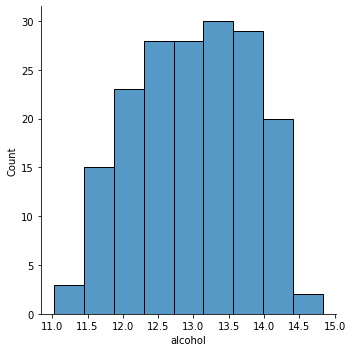

In [6]:
sns.displot(df['alcohol'], kde=0)

In [7]:
df["class"] = data['target']

<AxesSubplot:>

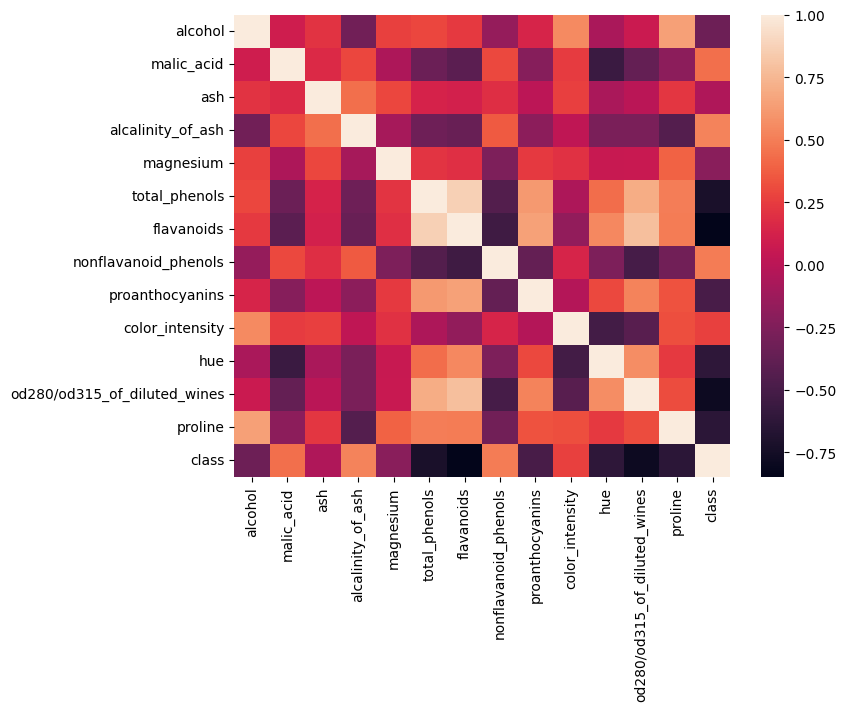

In [8]:
plt.figure(figsize=(8, 6))
cmap = df.corr()
sns.heatmap(cmap)

alcohol


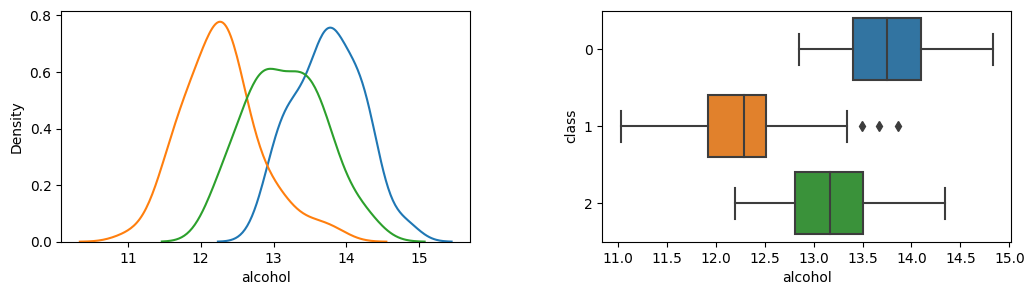

malic_acid


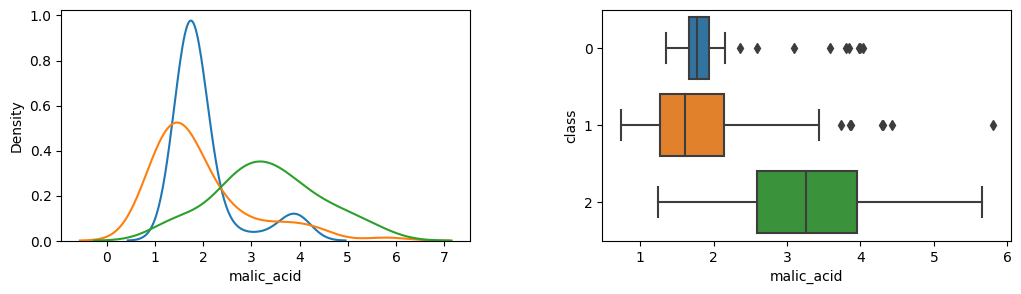

ash


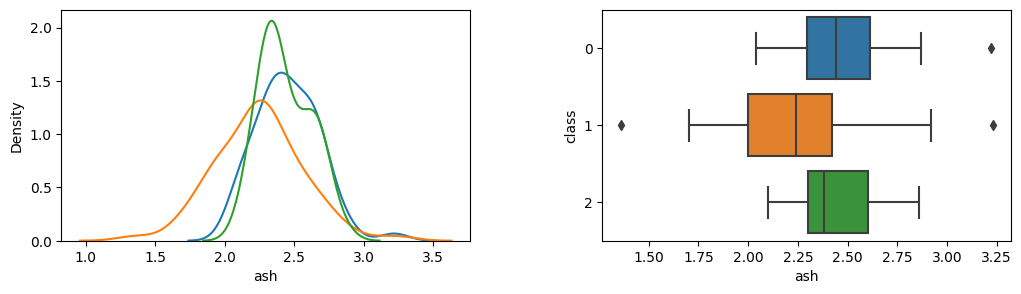

alcalinity_of_ash


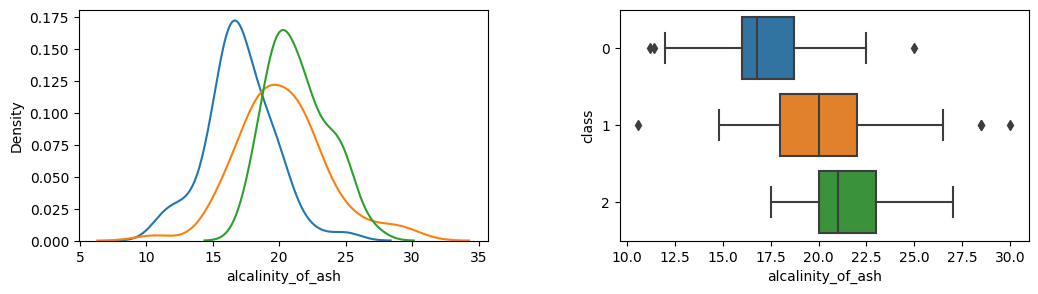

magnesium


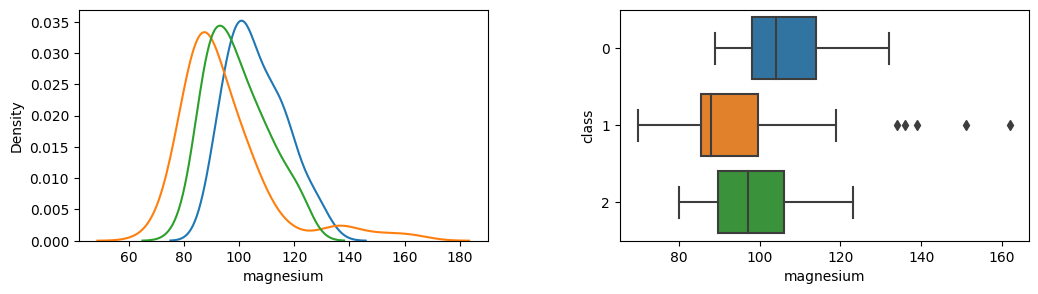

total_phenols


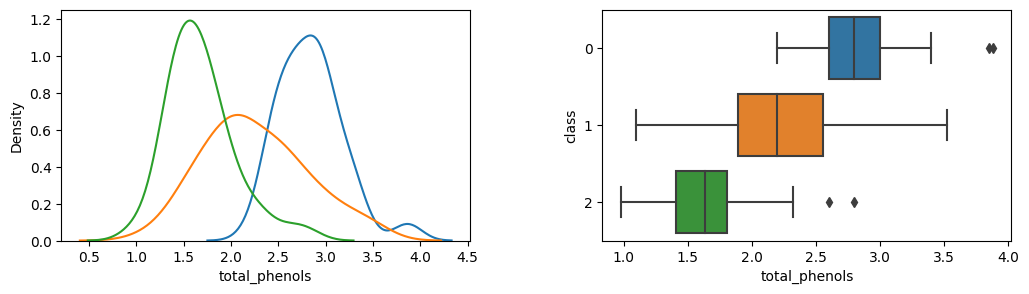

flavanoids


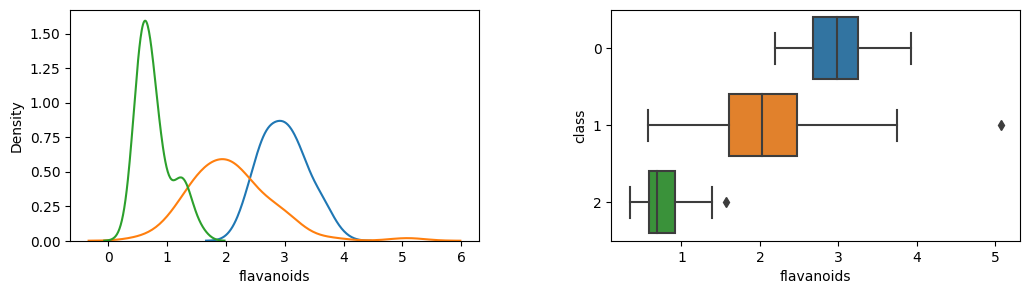

nonflavanoid_phenols


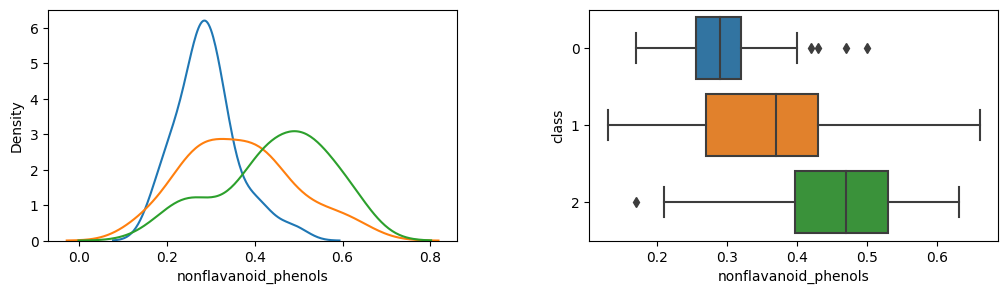

proanthocyanins


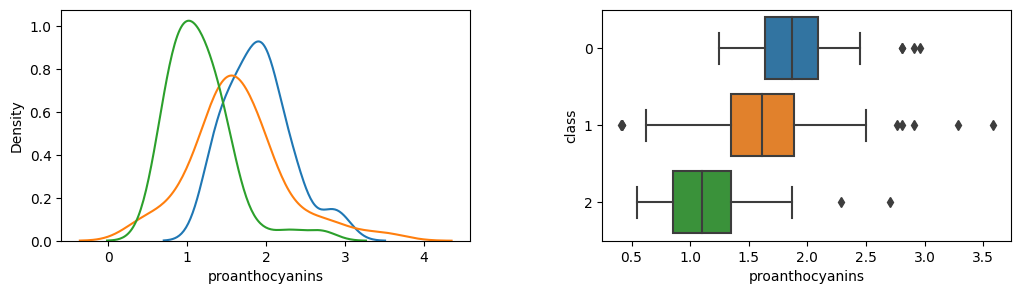

color_intensity


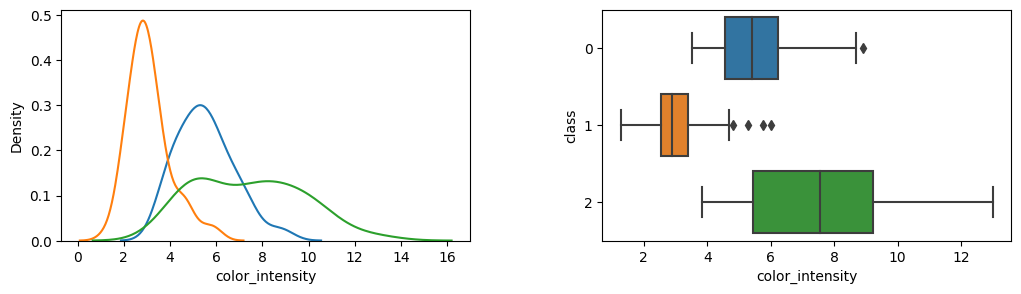

hue


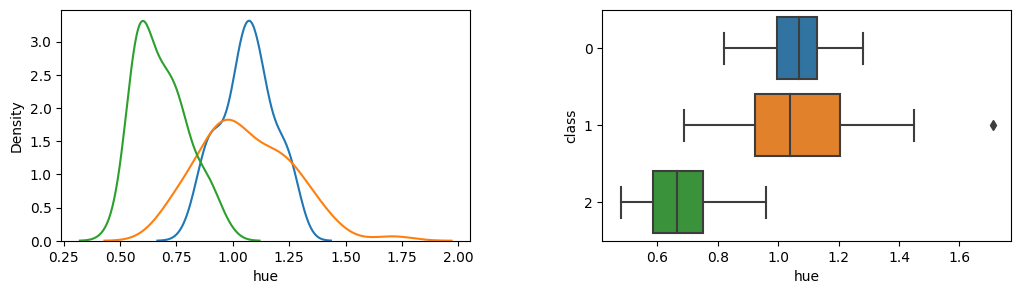

od280/od315_of_diluted_wines


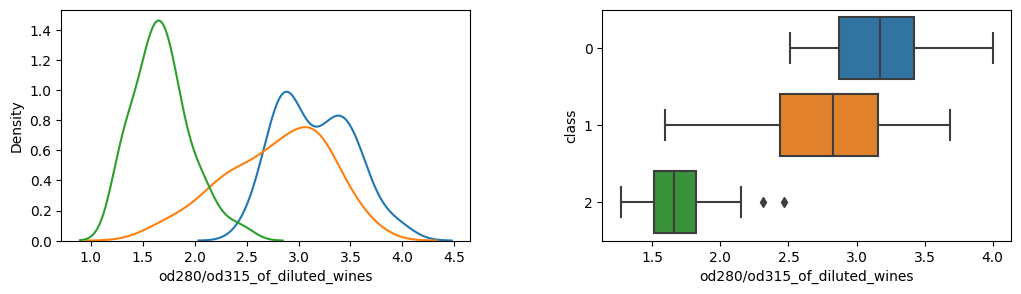

proline


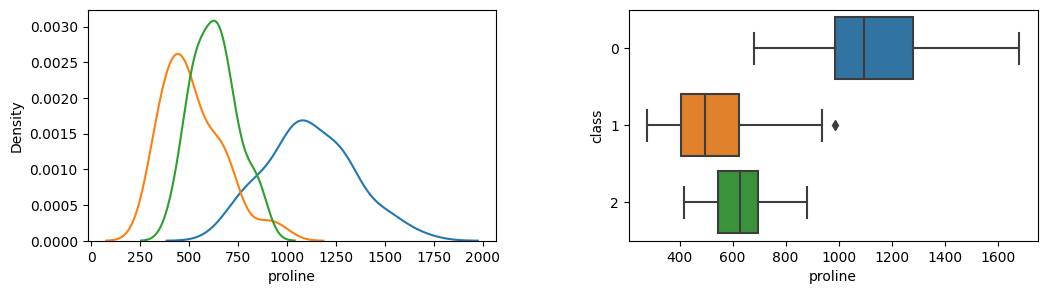

In [9]:
import matplotlib.gridspec as gridspec

for feature in df.columns:
    
    if feature == "class":
        continue
    print(feature)
#     sns.boxplot(data=data,x=data.target,y=data[feature])
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(20)
    gs1 = gridspec.GridSpec(1,3, width_ratios=[2,0.1,2])
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[0, 2])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=df, orient="h", ax=ax2)
#     sns.boxplot(data = df[[feature, 'class']], orient="h", ax=ax2)
    sns.kdeplot(df[feature][df['class']==0],ax=ax1,label='0')
    sns.kdeplot(df[feature][df['class']==1],ax=ax1,label='1')
    sns.kdeplot(df[feature][df['class']==2],ax=ax1,label='2')
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop(columns="class")
y = df["class"].astype('string')
feature_names = x.columns
labels = y.unique()

X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=3,random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
type(labels)

pandas.core.arrays.string_.StringArray

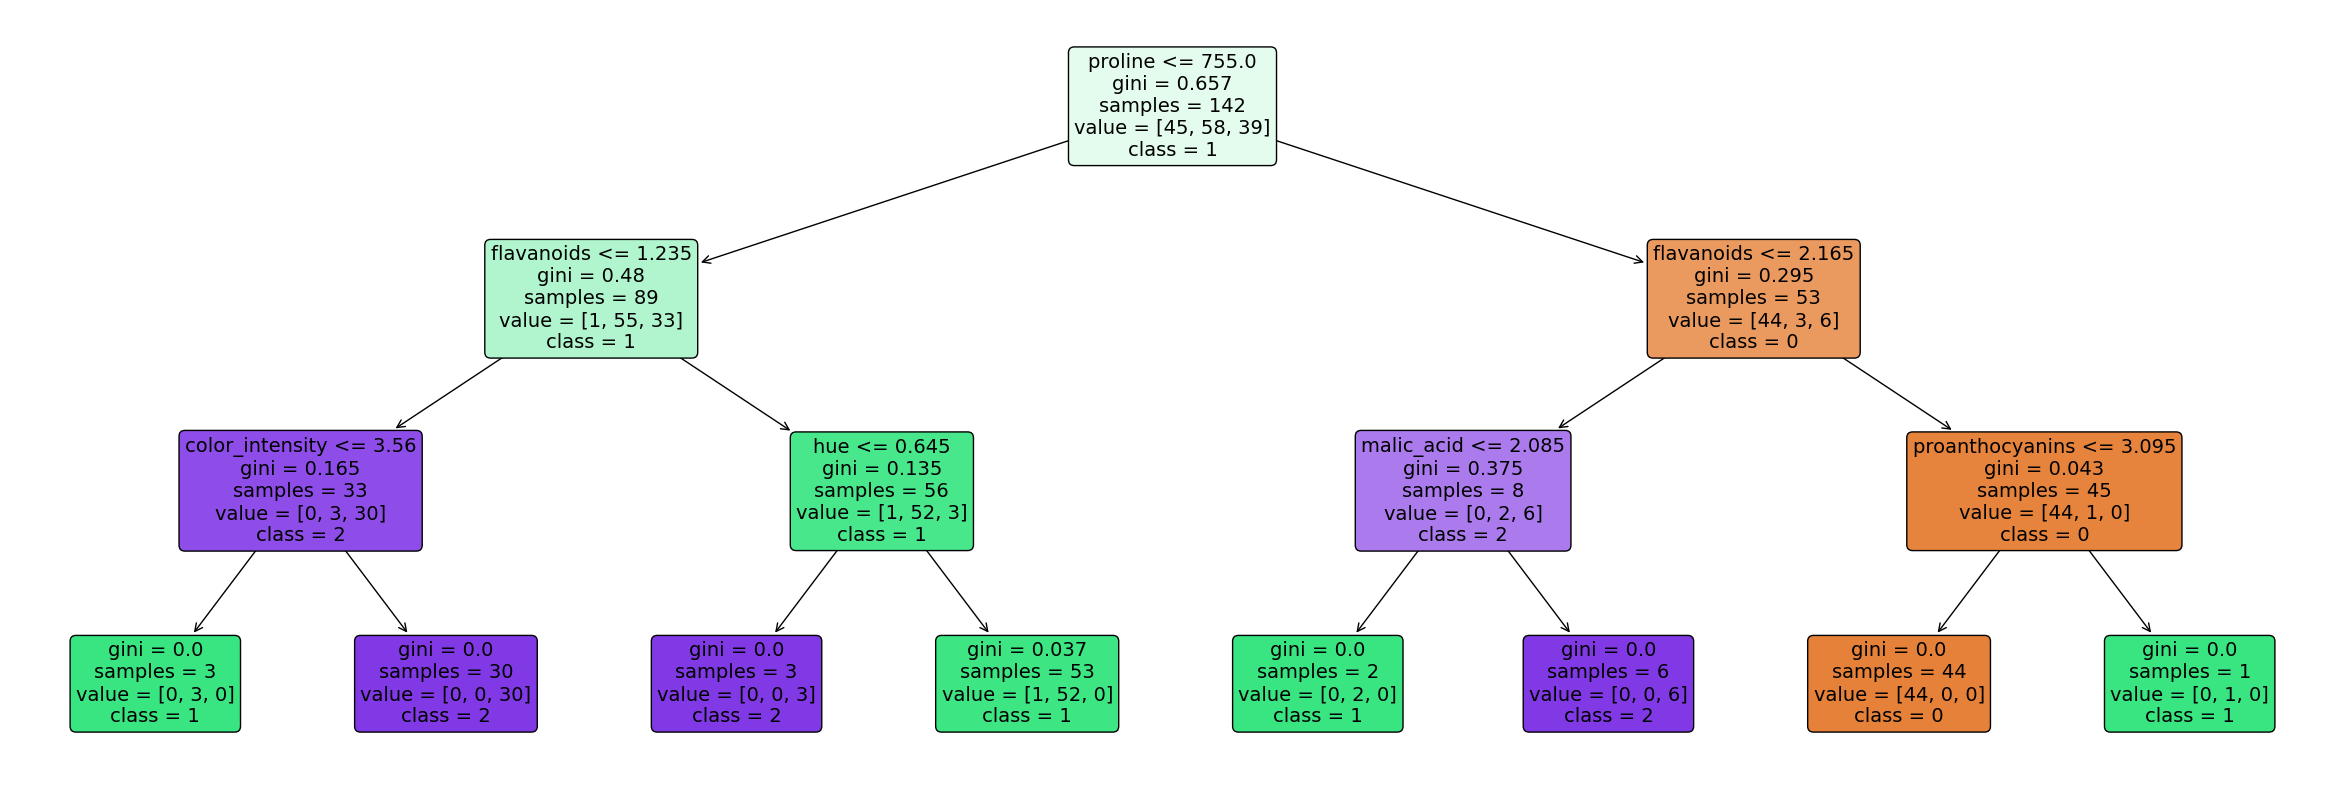

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [14]:
from sklearn.tree import export_text

tree_rules = export_text(clf,feature_names = list(feature_names))
print(tree_rules)

|--- proline <= 755.00
|   |--- flavanoids <= 1.24
|   |   |--- color_intensity <= 3.56
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.56
|   |   |   |--- class: 2
|   |--- flavanoids >  1.24
|   |   |--- hue <= 0.64
|   |   |   |--- class: 2
|   |   |--- hue >  0.64
|   |   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 2.08
|   |   |   |--- class: 1
|   |   |--- malic_acid >  2.08
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- proanthocyanins <= 3.10
|   |   |   |--- class: 0
|   |   |--- proanthocyanins >  3.10
|   |   |   |--- class: 1



In [15]:
test_pred_decision_tree = clf.predict(X_val)

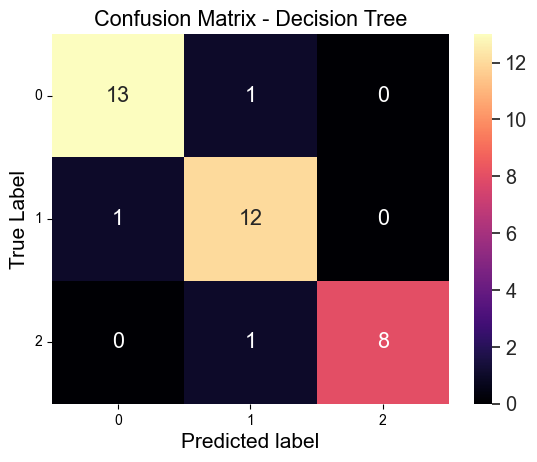

<Figure size 1000x700 with 0 Axes>

In [16]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_val,test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [17]:
metrics.accuracy_score(y_val, test_pred_decision_tree)

0.9166666666666666

In [18]:
print(metrics.classification_report(y_val,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.92      0.89        13
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [19]:
importance = pd.DataFrame({'feature': X_train.columns,'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                         feature  importance
6                     flavanoids       0.443
12                       proline       0.383
10                           hue       0.061
9                color_intensity       0.060
1                     malic_acid       0.033
8                proanthocyanins       0.021
0                        alcohol       0.000
2                            ash       0.000
3              alcalinity_of_ash       0.000
4                      magnesium       0.000
5                  total_phenols       0.000
7           nonflavanoid_phenols       0.000
11  od280/od315_of_diluted_wines       0.000
